<a href="https://colab.research.google.com/github/rajiv-ranjan/cds-mini-projects/blob/saif/M4_NB_MiniProject_1_Linear_Algebra_and_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini Project Notebook: Linear Algebra and Calculus

## Problem Statement

 The task is to advise a petroleum company on how to meet the demands of their customers for motor oil, diesel oil and gasoline.

## Learning Objectives

At the end of the experiment, you will be able to

* create arrays and matrices in python
* understand the concepts of linear equations
* solve the system of linear equations

### Data

From a barrel of crude oil, in one day, factory $A$ can produce
* 20 gallons of motor oil,
* 10 gallons of diesel oil, and
* 5 gallons of gasoline

Similarly, factory $B$ can produce
* 4 gallons of motor oil,
* 14 gallons of diesel oil, and
* 5 gallons of gasoline

while factory $C$ can produce
* 4 gallons of motor oil,
* 5 gallons of diesel oil, and
* 12 gallons of gasoline

There is also waste in the form of paraffin, among other things. Factory $A$ has 3 gallons of paraffin to dispose of per barrel of crude, factory $B$ 5 gallons, and factory $C$ 2 gallons.

**Note:** Your conclusion should include a discussion of the nature of the terms *unique*, *no solution*, *overdetermined* and *underdetermined* as they apply in the context of the oil plants.

## Grading = 10 Points

### Create an array

Create an array of size 2x3 with arbitrary values.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.misc
import sympy as sy

In [4]:
# YOUR CODE HERE
array = np.array([[5, 12, 7], [3, 9, 4]])
print(array)

[[ 5 12  7]
 [ 3  9  4]]


### Create the system of Linear Equations

Suppose the current daily demand from distributors is 6600 gallons of motor oil, 5100 gallons of diesel oil and 3100 of gasoline.

Set up the system of equations which describes the above situation. Please include the units as well.

Let the number of barrels used by factory $A$, $B$ and $C$ are $x$, $y$ and $z$ respectively.

Then the system of linear equations will be

$$Motor\ oil:\ \ \ 20x + 4y + 4z = 6600$$

$$Diesel\ oil:\ \ \ 10x + 14y + 5z = 5100$$

$$Gasoline:\ \ \ 5x + 5y + 12z = 3100$$

### Solve the system of Linear Equation (2 points)

How many barrels of crude oil each plant should get in order to meet the demand as a group. Remember that we can only provide each plant with an integral number of barrels.

In [5]:
# YOUR CODE HERE


A = np.array([[20, 4, 4], [10, 14, 5], [5, 5, 12]])

b = np.array([6600, 5100, 3100])

solution1 = np.linalg.solve(A, b)
print("Number of barrels for each factory (A, B, C):", solution1)

Number of barrels for each factory (A, B, C): [287.25 128.75  85.  ]


Suppose the total demand for all products **doubled**. What would the solution now be? How does it compare to the original solution? Why, mathematically, should this have been expected?

In [6]:
# YOUR CODE HERE

# new demand
b = 2 * np.array([6600, 5100, 3100])

solution2 = np.linalg.solve(A, b)
print("Number of barrels for each factory (A, B, C) to meet the double demand:", solution2)

Number of barrels for each factory (A, B, C) to meet the double demand: [574.5 257.5 170. ]


In [7]:
comparision = solution2 / solution1

print("difference:", comparision)

#The production is also doubled if the demand is doubled beacause production rates are same from each barrel {(ax + by +cz) here a,b,c are constant per barrel

difference: [2. 2. 2.]


Suppose that the company acquires another group of distributors and that the daily demand of this group is 2000 gallons of motor oil, 4000 gallons of gasoline, and 4000 gallons of diesel oil. How would you set up production of just this supply? Are there any options (more than one way)?

In [8]:
# YOUR CODE HERE

b_new = np.array([2000, 4000, 4000])

solution3 = np.linalg.solve(A, b_new)
print("Number of barrels for each factory (A, B, C) to meet the new demand:", solution3)

Number of barrels for each factory (A, B, C) to meet the new demand: [ 12.5 187.5 250. ]


In [9]:
det_A = np.linalg.det(A) #determinant
if det_A != 0:
    print("The system has a unique solution.")
#If the determinant of the coefficient matrix is non-zero, the system has a unique solution.

The system has a unique solution.


Next, calculate the needs of each factory (in barrels of crude, as usual) to meet the total demand of both groups of distributors. When you have done this, compare your answer to results already obtained. What mathematical conclusion can you draw?

In [10]:
# YOUR CODE HERE

b_total = np.array([8600, 9100, 7100])

solution4 = np.linalg.solve(A, b_total)
print("Number of barrels for each factory (A, B, C) to meet the total demand:", solution4)

Number of barrels for each factory (A, B, C) to meet the total demand: [299.75 316.25 335.  ]


In [11]:
temp = solution1 + solution3
temp

#So, the Total demand(rhs) is mathematical sum of Old demand and new demand so the solutions x,y,z(lhs) also gets summed mathematically due to linear relationship

array([299.75, 316.25, 335.  ])

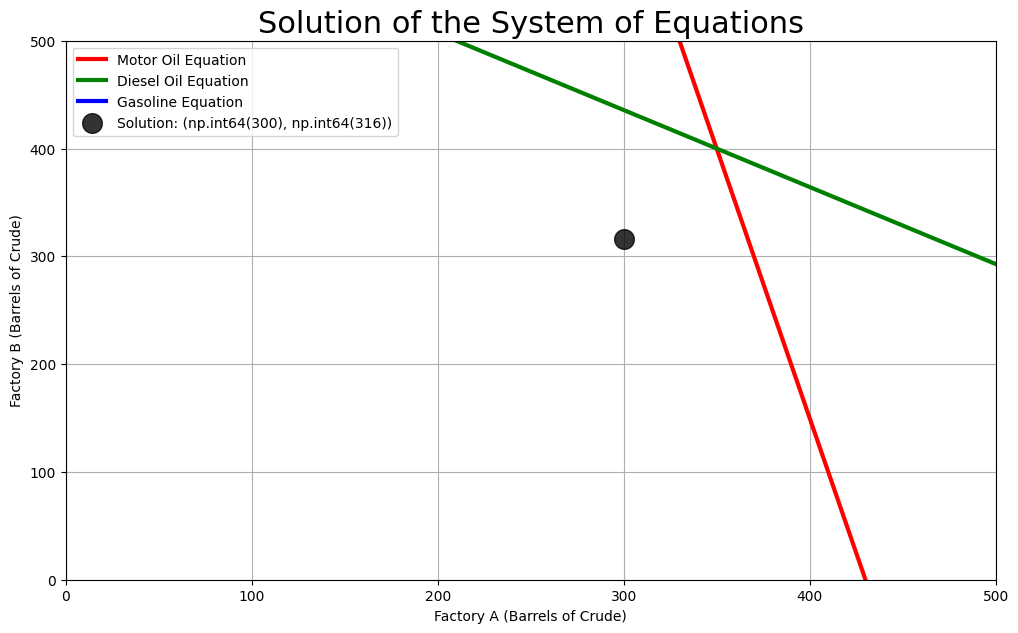

In [12]:
x = np.linspace(0, 500, 50)
y = np.linspace(0, 500, 50)
X, Y = np.meshgrid(x, y)

Z1 = (8600 - 20*X - 4*Y) / 4
Z2 = (9100 - 10*X - 14*Y) / 5
Z3 = (7100 - 5*X - 5*Y) / 12

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(x, (8600 - 20*x) / 4, label='Motor Oil Equation', lw=3, color='r')  # Red line
ax.plot(x, (9100 - 10*x) / 14, label='Diesel Oil Equation', lw=3, color='g')  # Green line
ax.plot(x, (7100 - 5*x) / 5, label='Gasoline Equation', lw=3, color='b')  # Blue line

solution = np.array([300, 316, 335])  # Example values for x, y, z (use actual results here)
ax.scatter(solution[0], solution[1], s=200, zorder=5, color='k', alpha=0.8, label=f'Solution: {tuple(solution[:2])}')

ax.set_xlim([0, 500])
ax.set_ylim([0, 500])

ax.set_title('Solution of the System of Equations', size=22)
ax.set_xlabel('Factory A (Barrels of Crude)')
ax.set_ylabel('Factory B (Barrels of Crude)')

ax.grid(True)
ax.legend()

plt.show()

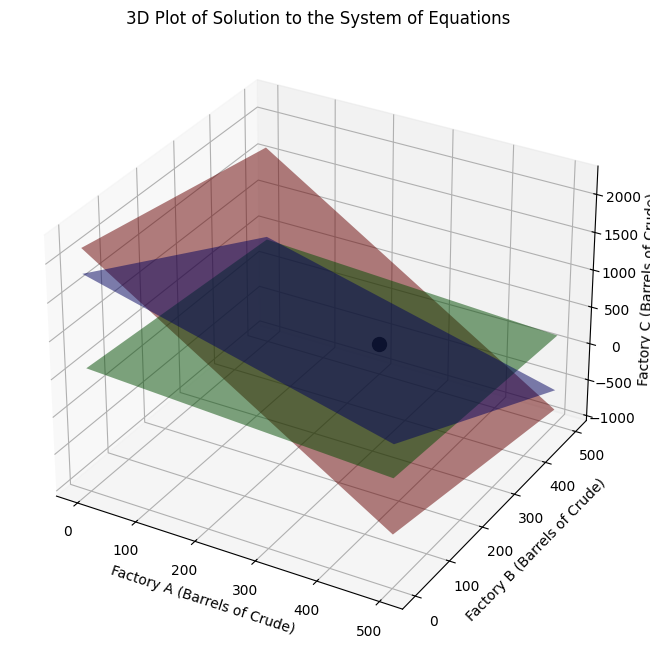

In [13]:
x = np.linspace(0, 500, 50)
y = np.linspace(0, 500, 50)

X, Y = np.meshgrid(x, y)

Z1 = (8600 - 20*X - 4*Y) / 4  # (20x + 4y + 4z = 8600)
Z2 = (9100 - 10*X - 14*Y) / 5  # (10x + 14y + 5z = 9100)
Z3 = (7100 - 5*X - 5*Y) / 12   # (5x + 5y + 12z = 7100)

# Plot the planes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each plane with different colors and alpha transparency
ax.plot_surface(X, Y, Z1, color='red', alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X, Y, Z2, color='blue', alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X, Y, Z3, color='green', alpha=0.5, rstride=100, cstride=100)

# intersection point
solution_total = np.array([300, 316, 335])
ax.scatter(solution_total[0], solution_total[1], solution_total[2], color='black', s=100)

# Labels
ax.set_xlabel('Factory A (Barrels of Crude)')
ax.set_ylabel('Factory B (Barrels of Crude)')
ax.set_zlabel('Factory C (Barrels of Crude)')
ax.set_title('3D Plot of Solution to the System of Equations')

plt.show()

### Sensitivity and Robustness (1 point)

In real life applications, constants are rarely ever exactly equal to their stated value; certain amounts of uncertainty are always present. This is part of the reason for the science of statistics. In the above model, the daily productions for the plants would be averages over a period of time. Explore what effect small changes in the parameters have on the output.

To do this, pick any 3 coefficients, one at a time, and increase or decrease them by 3%. For each case , note what effect this has on the solution, as a percentage change. Can you draw any overall conclusion?

In [14]:
# YOUR CODE HERE

b = np.array([6600, 5100, 3100])

# Function to compute new solution and percentage change
def analyze_change(A, b, row, col, change_percent):
    A2 = A.copy()
    A2[row, col] *= (1 + change_percent / 100.0)
    print(f"Changed coefficient: \n{A2}")
    solution5 = np.linalg.solve(A2, b)
    percent_change = ((solution5 - solution1) / solution1) * 100
    return solution5, percent_change

# Apply a 3% change to 3 different coefficients
changes = [(0, 0), (1, 1), (2, 2)]
results = {}

for row, col in changes:
    new_sol, pct_change = analyze_change(A, b, row, col, 3)
    results[(row, col)] = {
        'new_solution': new_sol,
        'percent_change': pct_change
    }

print("Original solution:", solution1)
for key, value in results.items():
    row, col = key
    print(f"\nChanged coefficient at A[{row}][{col}] by 3%:")
    print("New solution:", value['new_solution'])
    print("Percent change in solution:", value['percent_change'])

Changed coefficient: 
[[20  4  4]
 [10 14  5]
 [ 5  5 12]]
Changed coefficient: 
[[20  4  4]
 [10 14  5]
 [ 5  5 12]]
Changed coefficient: 
[[20  4  4]
 [10 14  5]
 [ 5  5 12]]
Original solution: [287.25 128.75  85.  ]

Changed coefficient at A[0][0] by 3%:
New solution: [287.25 128.75  85.  ]
Percent change in solution: [0. 0. 0.]

Changed coefficient at A[1][1] by 3%:
New solution: [287.25 128.75  85.  ]
Percent change in solution: [0. 0. 0.]

Changed coefficient at A[2][2] by 3%:
New solution: [287.25 128.75  85.  ]
Percent change in solution: [0. 0. 0.]


In [15]:
# Apply a 3% change to 3 different coefficients
changes = [(0, 1), (1, 2), (2, 0)]
results = {}

for row, col in changes:
    new_sol, pct_change = analyze_change(A, b, row, col, 20)
    results[(row, col)] = {
        'new_solution': new_sol,
        'percent_change': pct_change
    }

print("Original solution:", solution1)
for key, value in results.items():
    row, col = key
    print(f"\nChanged coefficient at A[{row}][{col}] by 20%:")
    print("New solution:", value['new_solution'])
    print("Percent change in solution:", value['percent_change'])

Changed coefficient: 
[[20  4  4]
 [10 14  5]
 [ 5  5 12]]
Changed coefficient: 
[[20  4  4]
 [10 14  6]
 [ 5  5 12]]
Changed coefficient: 
[[20  4  4]
 [10 14  5]
 [ 6  5 12]]
Original solution: [287.25 128.75  85.  ]

Changed coefficient at A[0][1] by 20%:
New solution: [287.25 128.75  85.  ]
Percent change in solution: [0. 0. 0.]

Changed coefficient at A[1][2] by 20%:
New solution: [288.27586207 120.68965517  87.93103448]
Percent change in solution: [ 0.35713214 -6.260462    3.44827586]

Changed coefficient at A[2][0] by 20%:
New solution: [291.62436548 136.04060914  55.83756345]
Percent change in solution: [  1.52284264   5.66260904 -34.30874888]


### A Plant Off-Line (1 point)

Suppose factory $C$ is shut down by the EPA (Environmental Protection Agency) temporarily for excessive emissions into the atmosphere. If your demand is as it was originally (6600, 5100, 3100), what would you now say about the companies ability to meet it? What do you recommend they schedule for production now?

In [16]:
# YOUR CODE HERE
A3 = np.array([
    [20, 4],
    [10, 14],
    [5, 5]
])
x_reduced = np.linalg.lstsq(A3, b, rcond=None)[0]  # least squares solution

# actual production
production = np.dot(A3, x_reduced)

# Compare to demand
residual = production - b
meets_demand = np.allclose(production, b, atol=1e-2)

print("Recommended barrels per factory (A, B):", x_reduced)
print("Meets demand exactly?:", meets_demand)
print("Production residual (how far off from demand):", residual)

Recommended barrels per factory (A, B): [299.47204969 168.47826087]
Meets demand exactly?: False
Production residual (how far off from demand): [  63.35403727  253.41614907 -760.2484472 ]


### Buying another plant

####(Note the following given information. You will see questions in continuation to this, in the subsequent sections)

This situation has caused enough concern that the CEO is considering buying another plant, identical to the third, and using it permanently. Assuming that all 4 plants are on line, what production do you recommend to meet the current demand (5000, 8500, 10000)? In general, what can you say about any increased flexibility that the 4th plant might provide?

Let the number of barrels used by factory $A$, $B$, $C$ and $D$ are $x$, $y$, $z$ and $w$ respectively.

Then the system of linear equations will be

$$20x + 4y + 4z + 4w = 5000$$

$$10x + 14y + 5z + 5w = 8500$$

$$5x + 5y + 12z + 12w = 10000$$

The above system of linear equation has fewer equations than variables, hence it is *underdetermined* and cannot have a unique solution. In this case, there are either infinitely many solutions or no exact solution. We can solve it by keeping $w$ as constant and using [rref](http://linear.ups.edu/html/section-RREF.html) form to solve the system of linear equation.

To know about rref implementation in python refer [here](https://docs.sympy.org/latest/tutorial/matrices.html#rref).

In [17]:
#import sympy as sy

# create symbol 'w'
w = sy.Symbol("w")
A_aug = sy.Matrix([[20, 4, 4, 5000-4*w],
                   [10, 14, 5, 8500-5*w],
                   [5, 5, 12, 10000-12*w]])
# show rref form
A_aug.rref()

(Matrix([
 [1, 0, 0,   195/4],
 [0, 1, 0,  1325/4],
 [0, 0, 1, 675 - w]]),
 (0, 1, 2))

From the above result, it can be seen that 4th plant will share the number of barrels required by the 3rd plant only, while the requirement of 1st and 2nd plant will remain unaffected.

### Calculate the amount of Paraffin supplied (1 point)

The company has just found a candle company that will buy its paraffin. Under the current conditions (i.e, after buying another plant) for demand (5000, 8500, 10000), how much can be supplied to them per day?

According to the problem statement, factory $A$ has 3 gallons of paraffin to dispose of per barrel of crude oil, factory $B$ 5 gallons, and factory $C$ 2 gallons.

In [18]:
# YOUR CODE HERE
A4 = np.array([
    [20, 4, 4, 4],   # Motor oil
    [10, 14, 5, 5],  # Diesel oil
    [5, 5, 12, 12]   # Gasoline
])

b4 = np.array([5000, 8500, 10000])

solution, residuals, rank, s = np.linalg.lstsq(A4, b4, rcond=None)

x, y, z, w = solution

# 3x (A) + 5y (B) + 2z (C) + 2w (D)
paraffin = 3*x + 5*y + 2*z + 2*w

print(f"Barrels per day: Factory A = {x:.2f}, B = {y:.2f}, C = {z:.2f}, D = {w:.2f}")
print(f"Total paraffin produced per day: {paraffin:.2f} gallons")

Barrels per day: Factory A = 48.75, B = 331.25, C = 337.50, D = 337.50
Total paraffin produced per day: 3152.50 gallons


### Selling the first plant (1 point)

The management is also considering selling the first plant due to aging equipment and high workman's compensation costs for the state it is located in. They would like to know what this would do to their production capability. Specifically, they would like an example of a demand they could not meet with only plants 2 and 3, and also what effect having plant 4 has (recall it is identical to plant 3). They would also like an example of a demand that they could meet with just plants 2 and 3. Any general statements you could make here would be helpful.

Let the number of barrels used by factory $B$, $C$ and $D$ are $y$, $z$ and $w$ respectively.

When considering only plants 2 and 3, and demand (5000, 8500, 10000) then we have

$$4y + 4z = 5000$$

$$14y + 5z = 8500$$

$$5y + 12z = 10000$$

In [20]:
# YOUR CODE HERE
y, z, w = sy.symbols('y z w')

#(demand: 5000 motor oil, 8500 diesel, 10000 gasoline)
# 4y + 4z = 5000
# 14y + 5z = 8500
# 5y + 12z = 10000

A_BC = sy.Matrix([
    [4, 4, 5000],
    [14, 5, 8500],
    [5, 12, 10000]
])

rref_BC = A_BC.rref()
print("RREF without Plant A:")
print(rref_BC)

RREF without Plant A:
(Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]), (0, 1, 2))


Taking 4th plant into consideration.
Let the number of barrels used by factory $B$, $C$ and $D$ are $y$, $z$ and $w$ respectively.

Then for demand (5000, 8500, 10000) the system of linear equations will be

$$4y + 4z + 4w = 5000$$

$$14y + 5z + 5w = 8500$$

$$5y + 12z + 12w = 10000$$

Solve it using rref form.

In [21]:
# YOUR CODE HERE
Y, Z, w = sy.symbols('y Z w')

A_BCD = sy.Matrix([
    [4, 4, 4, 5000],
    [14, 5, 5, 8500],
    [5, 12, 12, 10000]
])

rref_BCD = A_BCD.rref()
print("\nRREF with Plants B, C, and D:")
print(rref_BCD)


RREF with Plants B, C, and D:
(Matrix([
[1, 0, 0, 0],
[0, 1, 1, 0],
[0, 0, 0, 1]]), (0, 1, 3))


Now, changing demand to (6600, 5100, 3100) and solving the system of equation using rref form.

In [22]:
# YOUR CODE HERE
Y, Z = sy.symbols('y Z')

A_BCD = sy.Matrix([
    [4, 4, 4, 6600],
    [14, 5, 5, 5100],
    [5, 12, 12, 3100]
])

rref_BCD = A_BCD.rref()
print("\nRREF with Plants B, C, and D:")
print(rref_BCD)


RREF with Plants B, C, and D:
(Matrix([
[1, 0, 0, 0],
[0, 1, 1, 0],
[0, 0, 0, 1]]), (0, 1, 3))


### Set rates for Products (1 point)

Company wants to set the rates of motor oil, diesel oil, and gasoline. For this purpose they have few suggestions given as follows:

* 100, 66, 102 Rupees per gallon,

* 104, 64, 100 Rupees per gallon,

* 102, 68, 98 Rupees per gallon, and

* 96, 68, 100 Rupees per gallon

for motor oil, diesel oil, and gasoline respectively.

Using matrix multiplication, find the rates which result in maximum total price.

Let $M$ denote the matrix such that rows represents different plants (A, B and C), columns represents different products (motor oil, diesel oil and gasoline) and each value represents production of that product from one barrel of crude oil for that plant.

$$M = \begin{bmatrix}
20 & 10 & 5 \\
4 & 14 & 5  \\
 4 & 5 & 12  
\end{bmatrix}$$

Also, $R$ is a matrix having different rates as its columns.

$$R = \begin{bmatrix}
100 & 104 & 102 & 96 \\
66 & 64 & 68 & 68  \\
102 & 100 & 98 & 100  
\end{bmatrix}$$

In [23]:
# YOUR CODE HERE
M = np.array([
    [20, 4, 4],
    [10, 14, 5],
    [5, 5, 12]
])

R = np.array([
    [100, 66, 102], #7160
    [104, 64, 100],  #7212
    [102, 68, 98],   #7192
    [96, 68, 100]   #7024
])

total_revenue = np.dot(M, R.T)
print(total_revenue.T)

#Strategy 2 price have good revenue

[[2672 2434 2054]
 [2736 2436 2040]
 [2704 2462 2026]
 [2592 2412 2020]]


### Marginal Cost (1 point)

The total cost $C(x)$ in Rupees, associated with the production of $x$ gallons of gasoline is given by

$$C(x) = 0.005 x^3 – 0.02 x^2 + 30x + 5000$$

Find the marginal cost when $22$ gallons are produced, where, marginal cost means the instantaneous rate of change of total cost at any level of output.

In [24]:
# YOUR CODE HERE
x = sy.Symbol('x')

C = 0.005 * x**3 - 0.02 * x**2 + 30 * x + 5000

C_prime = sy.diff(C, x)

marginal_cost_at_22 = C_prime.subs(x, 22)

print("Marginal Cost Function:", C_prime)
print(f"Marginal Cost at x = 22:  {marginal_cost_at_22:.2f}")

Marginal Cost Function: 0.015*x**2 - 0.04*x + 30
Marginal Cost at x = 22:  36.38


### Marginal Revenue (1 point)

The total revenue in Rupees received from the sale of $x$ gallons of a motor oil is given by $$R(x) = 3x^2 + 36x + 5.$$

Find the marginal revenue, when $x = 28$, where, marginal revenue means the rate of change of total revenue with respect to the number of items sold at an instant.

In [25]:
# YOUR CODE HERE
x = sy.Symbol('x')

R = 3 * x**2 + 36 * x + 5

R_prime = sy.diff(R, x)

marginal_revenue_at_28 = R_prime.subs(x, 28)

print("Marginal Revenue Function:", R_prime)
print("Marginal Revenue at x = 28:", marginal_revenue_at_28)

Marginal Revenue Function: 6*x + 36
Marginal Revenue at x = 28: 204


### Pouring crude oil in tank (1 point)

In a cylindrical tank of radius 10 meter, crude oil is being poured at the rate of 314 cubic meter per hour. Then find

* the rate at which the height of crude oil is increasing in the tank, and
* the height of crude oil in tank after 2 hours.

In [27]:
# YOUR CODE HERE
t = sy.Symbol('t')
h = sy.Function('h')(t)

r = 10
dV_dt = 314

V = sy.pi * r**2 * h

dVdt_expr = sy.diff(V, t)

dh_dt = sy.solve(sy.Eq(dVdt_expr, dV_dt), sy.Derivative(h, t))[0]

height_after_2_hours = dh_dt * 2

print("Rate of height increase (dh/dt):", dh_dt)
print("Height after 2 hours:", height_after_2_hours.simplify())

Rate of height increase (dh/dt): 157/(50*pi)
Height after 2 hours: 157/(25*pi)
